<a href="https://colab.research.google.com/github/ClaFlorez/Machine_Learning_Simplifie/blob/main/10_1_Neurone_artificiel_de_A_a_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONSTRUCTION D'UN NEURONE ARTIFICIEL
Objectif: Prédire l'achat d'un produit selon âge et revenu

Création des données d'entraînement:
Dataset créé:
  • Nombre de clients: 1,000
  • Taux d'achat global: 51.5%
  • Âge moyen: 43.5 ans
  • Revenu moyen: 60,561€

Données standardisées:
  • Âge standardisé: moyenne=0.000, std=1.000
  • Revenu standardisé: moyenne=0.000, std=1.000
Neurone initialisé:
  • Nombre d'entrées: 2
  • Poids initiaux: [0.18709652 0.03896142]
  • Biais initial: -0.087

Entraînement du neurone:
Paramètres d'entraînement:
  • Epochs: 1000
  • Taux d'apprentissage: 0.1
  • Échantillons d'entraînement: 1000
  Epoch    0: Erreur moyenne = 0.114854
  Epoch  100: Erreur moyenne = 0.078942
  Epoch  200: Erreur moyenne = 0.078942
  Epoch  300: Erreur moyenne = 0.078942
  Epoch  400: Erreur moyenne = 0.078942
  Epoch  500: Erreur moyenne = 0.078942
  Epoch  600: Erreur moyenne = 0.078942
  Epoch  700: Erreur moyenne = 0.078942
  Epoch  800: Erreur moyenne = 0.078942
  Epoch  90

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


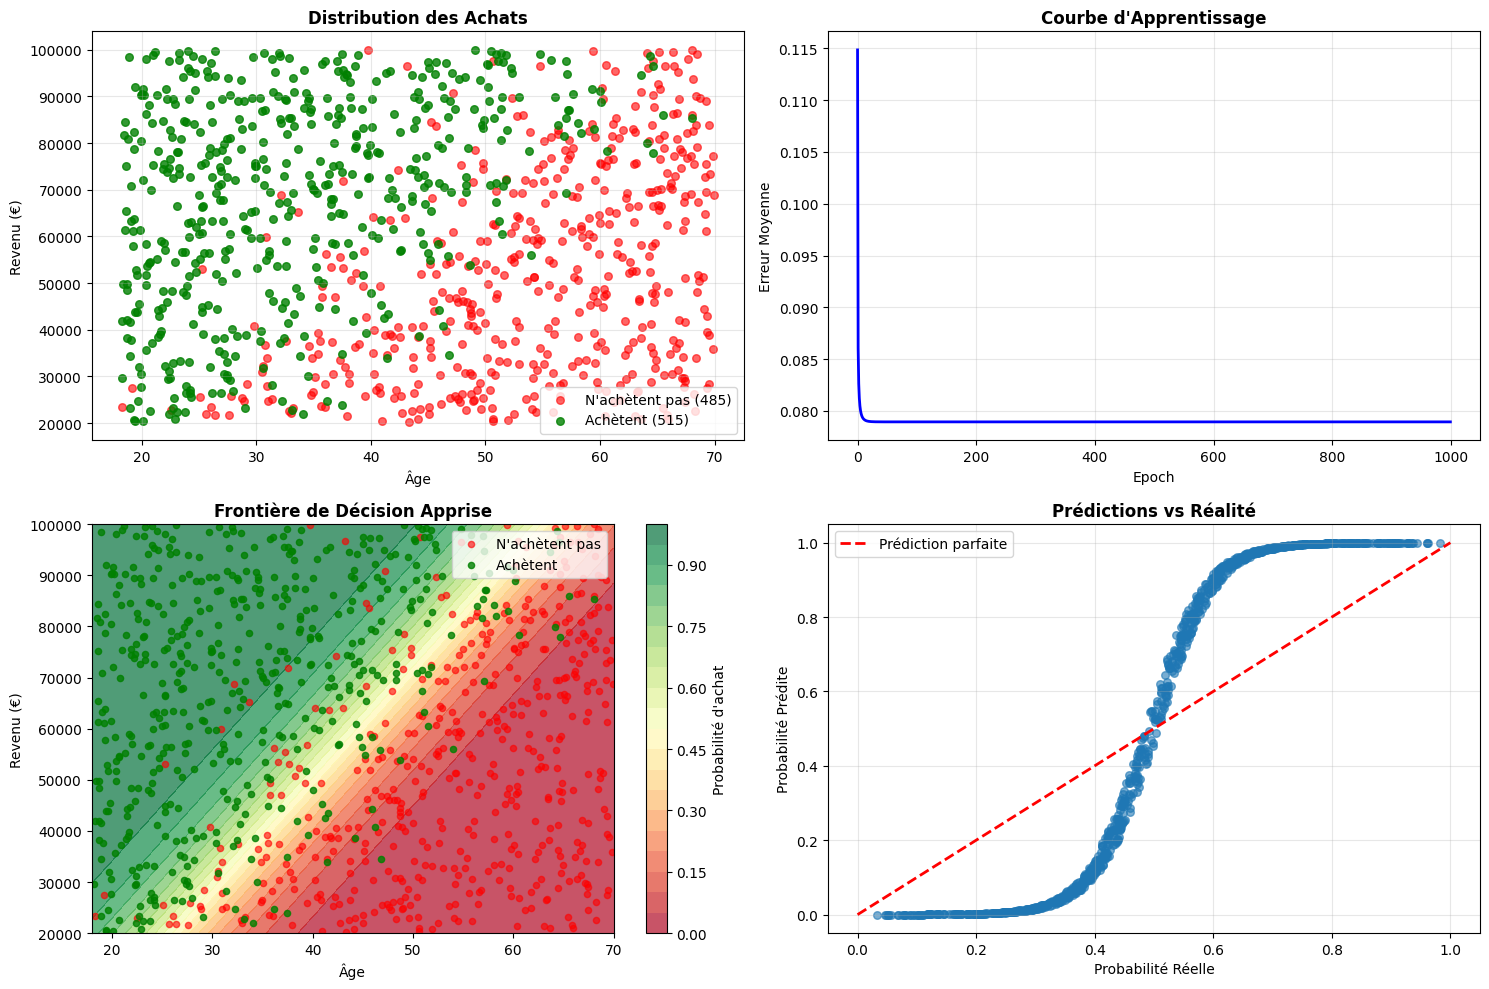


Performance du neurone:
  • Accuracy: 0.890 (89.0%)

Analyse de ce que le neurone a appris:
Corrélations apprises:
  • Âge vs Prédiction: -0.798
  • Revenu vs Prédiction: +0.458
  ✓ Le neurone a appris que les jeunes achètent plus
  ✓ Le neurone a appris que les riches achètent plus

Limites d'un neurone unique:
❌ Ne peut apprendre que des relations linéaires
❌ Pas assez de capacité pour problèmes complexes
❌ Sensible à l'initialisation des poids
❌ Peut rester bloqué dans des minima locaux

💡 Solution: Combiner plusieurs neurones en réseau !


In [1]:
#Neurone artificiel de A à Z
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Construction d'un neurone artificiel from scratch
print("CONSTRUCTION D'UN NEURONE ARTIFICIEL")
print("Objectif: Prédire l'achat d'un produit selon âge et revenu")
print("=" * 80)

class NeuroneSimple:
    """
    Un neurone artificiel implémenté from scratch pour comprendre le fonctionnement
    """

    def __init__(self, n_inputs):
        """
        Initialise le neurone avec des poids aléatoires
        """
        # Initialisation aléatoire des poids (small random values)
        self.weights = np.random.randn(n_inputs) * 0.1
        self.bias = np.random.randn() * 0.1

        print(f"Neurone initialisé:")
        print(f"  • Nombre d'entrées: {n_inputs}")
        print(f"  • Poids initiaux: {self.weights}")
        print(f"  • Biais initial: {self.bias:.3f}")

    def fonction_activation(self, x):
        """
        Fonction sigmoïde : transforme n'importe quel nombre en probabilité (0-1)
        """
        # Éviter l'overflow pour les grandes valeurs
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def forward(self, inputs):
        """
        Propagation avant : calcule la sortie du neurone
        """
        # Étape 1: Somme pondérée des entrées
        somme_ponderee = np.dot(inputs, self.weights) + self.bias

        # Étape 2: Application de la fonction d'activation
        output = self.fonction_activation(somme_ponderee)

        return output, somme_ponderee

    def calculer_erreur(self, prediction, vraie_valeur):
        """
        Calcule l'erreur entre prédiction et réalité
        """
        return (prediction - vraie_valeur) ** 2

    def apprendre(self, inputs, vraie_valeur, taux_apprentissage=0.1):
        """
        Ajuste les poids pour réduire l'erreur (apprentissage)
        """
        # Propagation avant
        prediction, somme_ponderee = self.forward(inputs)

        # Calculer l'erreur
        erreur = prediction - vraie_valeur

        # Calculer les gradients (dérivées)
        # Dérivée de la sigmoïde : sigmoid * (1 - sigmoid)
        derivee_activation = prediction * (1 - prediction)
        gradient_poids = erreur * derivee_activation * inputs
        gradient_biais = erreur * derivee_activation

        # Mise à jour des poids (gradient descent)
        self.weights -= taux_apprentissage * gradient_poids
        self.bias -= taux_apprentissage * gradient_biais

        return self.calculer_erreur(prediction, vraie_valeur)

# Créer des données d'exemple : âge et revenu vs probabilité d'achat
print(f"\nCréation des données d'entraînement:")
print("=" * 50)

np.random.seed(42)
n_clients = 1000

# Générer des données réalistes
ages = np.random.uniform(18, 70, n_clients)
revenus = np.random.uniform(20000, 100000, n_clients)

# Règle business : plus on est jeune ET riche, plus on achète
# Créer une fonction logique pour générer les labels
def probabilite_achat_reelle(age, revenu):
    """Fonction qui simule la vraie probabilité d'achat"""
    # Normaliser les variables
    age_norm = (age - 18) / (70 - 18)  # 0 à 1
    revenu_norm = (revenu - 20000) / (100000 - 20000)  # 0 à 1

    # Règle : jeunes riches achètent plus
    score = (1 - age_norm) * 0.6 + revenu_norm * 0.4
    return score

# Générer les labels
probabilites_reelles = [probabilite_achat_reelle(age, revenu) for age, revenu in zip(ages, revenus)]
achats = [1 if prob > 0.5 + np.random.normal(0, 0.1) else 0 for prob in probabilites_reelles]

# Créer le dataset
df_clients = pd.DataFrame({
    'age': ages,
    'revenu': revenus,
    'probabilite_reelle': probabilites_reelles,
    'achat': achats
})

print(f"Dataset créé:")
print(f"  • Nombre de clients: {len(df_clients):,}")
print(f"  • Taux d'achat global: {np.mean(achats):.1%}")
print(f"  • Âge moyen: {ages.mean():.1f} ans")
print(f"  • Revenu moyen: {revenus.mean():,.0f}€")

# Visualiser les données
plt.figure(figsize=(15, 10))

# Graphique 1: Distribution des achats par âge et revenu
plt.subplot(2, 2, 1)
acheteurs = df_clients[df_clients['achat'] == 1]
non_acheteurs = df_clients[df_clients['achat'] == 0]

plt.scatter(non_acheteurs['age'], non_acheteurs['revenu'],
           alpha=0.6, c='red', s=30, label=f'N\'achètent pas ({len(non_acheteurs)})')
plt.scatter(acheteurs['age'], acheteurs['revenu'],
           alpha=0.8, c='green', s=30, label=f'Achètent ({len(acheteurs)})')

plt.xlabel('Âge')
plt.ylabel('Revenu (€)')
plt.title('Distribution des Achats', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Standardiser les données pour le neurone
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(df_clients[['age', 'revenu']])
targets = df_clients['achat'].values

print(f"\nDonnées standardisées:")
print(f"  • Âge standardisé: moyenne={inputs_scaled[:, 0].mean():.3f}, std={inputs_scaled[:, 0].std():.3f}")
print(f"  • Revenu standardisé: moyenne={inputs_scaled[:, 1].mean():.3f}, std={inputs_scaled[:, 1].std():.3f}")

# Créer et entraîner le neurone
neurone = NeuroneSimple(n_inputs=2)

print(f"\nEntraînement du neurone:")
print("=" * 40)

# Entraînement sur plusieurs epochs
n_epochs = 1000
erreurs = []
taux_apprentissage = 0.1

print(f"Paramètres d'entraînement:")
print(f"  • Epochs: {n_epochs}")
print(f"  • Taux d'apprentissage: {taux_apprentissage}")
print(f"  • Échantillons d'entraînement: {len(inputs_scaled)}")

for epoch in range(n_epochs):
    erreur_totale = 0

    # Entraîner sur tous les exemples
    for i in range(len(inputs_scaled)):
        erreur = neurone.apprendre(inputs_scaled[i], targets[i], taux_apprentissage)
        erreur_totale += erreur

    erreur_moyenne = erreur_totale / len(inputs_scaled)
    erreurs.append(erreur_moyenne)

    # Afficher le progrès
    if epoch % 100 == 0 or epoch == n_epochs - 1:
        print(f"  Epoch {epoch:4d}: Erreur moyenne = {erreur_moyenne:.6f}")

print(f"\nPoids finaux appris:")
print(f"  • Poids âge: {neurone.weights[0]:.3f}")
print(f"  • Poids revenu: {neurone.weights[1]:.3f}")
print(f"  • Biais: {neurone.bias:.3f}")

# Interpréter les poids
print(f"\nInterprétation des poids appris:")
if neurone.weights[0] > 0:
    print(f"  • Âge: Impact POSITIF ({neurone.weights[0]:.3f}) - Plus âgé = plus d'achat")
else:
    print(f"  • Âge: Impact NÉGATIF ({neurone.weights[0]:.3f}) - Plus jeune = plus d'achat")

if neurone.weights[1] > 0:
    print(f"  • Revenu: Impact POSITIF ({neurone.weights[1]:.3f}) - Plus riche = plus d'achat")
else:
    print(f"  • Revenu: Impact NÉGATIF ({neurone.weights[1]:.3f}) - Plus pauvre = plus d'achat")

# Visualiser l'apprentissage
plt.subplot(2, 2, 2)
plt.plot(erreurs, linewidth=2, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Erreur Moyenne')
plt.title('Courbe d\'Apprentissage', fontweight='bold')
plt.grid(True, alpha=0.3)

# Tester le neurone sur de nouveaux exemples
print(f"\nTest du neurone entraîné:")
print("=" * 40)

exemples_test = [
    {'age': 25, 'revenu': 80000, 'description': 'Jeune cadre'},
    {'age': 60, 'revenu': 30000, 'description': 'Senior modeste'},
    {'age': 35, 'revenu': 55000, 'description': 'Adulte classe moyenne'},
    {'age': 22, 'revenu': 25000, 'description': 'Jeune étudiant'}
]

for exemple in exemples_test:
    # Standardiser l'exemple
    exemple_scaled = scaler.transform([[exemple['age'], exemple['revenu']]])[0]

    # Prédiction
    prediction, _ = neurone.forward(exemple_scaled)

    print(f"\n{exemple['description']} ({exemple['age']} ans, {exemple['revenu']:,}€):")
    print(f"  • Probabilité d'achat prédite: {prediction:.1%}")

    if prediction > 0.7:
        print(f"  • Recommandation: CIBLER (forte probabilité)")
    elif prediction > 0.4:
        print(f"  • Recommandation: ÉVALUER (probabilité modérée)")
    else:
        print(f"  • Recommandation: NE PAS CIBLER (faible probabilité)")

# Visualiser la frontière de décision apprise
plt.subplot(2, 2, 3)

# Créer une grille pour visualiser la frontière
age_range = np.linspace(18, 70, 50)
revenu_range = np.linspace(20000, 100000, 50)
Age_grid, Revenu_grid = np.meshgrid(age_range, revenu_range)

# Prédictions sur la grille
grid_points = np.column_stack([Age_grid.ravel(), Revenu_grid.ravel()])
grid_scaled = scaler.transform(grid_points)

predictions_grid = []
for point in grid_scaled:
    pred, _ = neurone.forward(point)
    predictions_grid.append(pred)

predictions_grid = np.array(predictions_grid).reshape(Age_grid.shape)

# Visualiser
contour = plt.contourf(Age_grid, Revenu_grid, predictions_grid, levels=20, cmap='RdYlGn', alpha=0.7)
plt.colorbar(contour, label='Probabilité d\'achat')

# Ajouter les points d'entraînement
plt.scatter(non_acheteurs['age'], non_acheteurs['revenu'],
           alpha=0.6, c='red', s=20, label='N\'achètent pas')
plt.scatter(acheteurs['age'], acheteurs['revenu'],
           alpha=0.8, c='green', s=20, label='Achètent')

plt.xlabel('Âge')
plt.ylabel('Revenu (€)')
plt.title('Frontière de Décision Apprise', fontweight='bold')
plt.legend()

# Comparer avec la vraie fonction
plt.subplot(2, 2, 4)

# Calculer les prédictions sur les données de test
predictions_test = []
for point in inputs_scaled:
    pred, _ = neurone.forward(point)
    predictions_test.append(pred)

# Comparer prédictions vs réalité
plt.scatter(df_clients['probabilite_reelle'], predictions_test, alpha=0.6, s=30)
plt.plot([0, 1], [0, 1], 'r--', linewidth=2, label='Prédiction parfaite')
plt.xlabel('Probabilité Réelle')
plt.ylabel('Probabilité Prédite')
plt.title('Prédictions vs Réalité', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Évaluer la performance
predictions_binaires = [1 if p > 0.5 else 0 for p in predictions_test]
accuracy = np.mean([pred == true for pred, true in zip(predictions_binaires, targets)])

print(f"\nPerformance du neurone:")
print(f"  • Accuracy: {accuracy:.3f} ({accuracy:.1%})")

# Analyser ce que le neurone a appris
print(f"\nAnalyse de ce que le neurone a appris:")
print("=" * 50)

# Le neurone a-t-il capturé la vraie relation ?
correlation_age = np.corrcoef(df_clients['age'], predictions_test)[0, 1]
correlation_revenu = np.corrcoef(df_clients['revenu'], predictions_test)[0, 1]

print(f"Corrélations apprises:")
print(f"  • Âge vs Prédiction: {correlation_age:+.3f}")
print(f"  • Revenu vs Prédiction: {correlation_revenu:+.3f}")

if correlation_age < -0.3:
    print("  ✓ Le neurone a appris que les jeunes achètent plus")
else:
    print("  ⚠ Le neurone n'a pas bien capturé l'effet de l'âge")

if correlation_revenu > 0.3:
    print("  ✓ Le neurone a appris que les riches achètent plus")
else:
    print("  ⚠ Le neurone n'a pas bien capturé l'effet du revenu")

# Limites d'un seul neurone
print(f"\nLimites d'un neurone unique:")
print("=" * 40)
print("❌ Ne peut apprendre que des relations linéaires")
print("❌ Pas assez de capacité pour problèmes complexes")
print("❌ Sensible à l'initialisation des poids")
print("❌ Peut rester bloqué dans des minima locaux")

print(f"\n💡 Solution: Combiner plusieurs neurones en réseau !")